# Import necessary libraries

In [1]:
# Sklearn
from sklearn.model_selection import train_test_split

# Tensorflow
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model

# Plotting tools
import matplotlib.pyplot as plt

# Other modules
import pandas as pd
import numpy as np

# Load dataset from UCI: Predict Fuel Efficiency


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(
    url, names=column_names,
    na_values='?', comment='\t',
    sep=' ', skipinitialspace=True
)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Check NaN values and duplicates data

In [3]:
df.isna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [4]:
print(df.isna().sum())
print("-"*30)
print(f"Number of NaN values: {df.isna().sum().sum()}")

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
------------------------------
Number of NaN values: 6


In [5]:
df.dropna(inplace=True)
print(df.isna().sum())
print("-"*30)
print(f"Number of NaN values after dropping: {df.isna().sum().sum()}")

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
------------------------------
Number of NaN values after dropping: 0


In [6]:
print(df.duplicated())
print("-"*40)
print(f"Number of duplicates: {df.duplicated().sum()}")

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 392, dtype: bool
----------------------------------------
Number of duplicates: 0


# Split data into train-val-test

There are two approaches:

1.   Small dataset: Split data into 80:20 train:test, and use K-fold cross-validation during the training
2.   Large dataset: Split data into 80:10:10 train:val:test



### Separate X's (features) and y's (target)

In [7]:
X = df.drop(labels="MPG", axis=1)
y = df["MPG"]

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (392, 7)
Shape of y: (392,)


### Approach 1

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=777)

print(f"Shape of X: {X.shape}")
print(f"Shape of X_train: {X_train1.shape}")
print(f"Shape of X_test: {X_test1.shape}")

Shape of X: (392, 7)
Shape of X_train: (313, 7)
Shape of X_test: (79, 7)


### Approach 2

In [9]:
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=777)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, shuffle=True, random_state=777)

print(f"Shape of X: {X.shape}")
print(f"Shape of X_train: {X_train2.shape}")
print(f"Shape of X_valid: {X_val2.shape}")
print(f"Shape of X_test: {X_test2.shape}")


Shape of X: (392, 7)
Shape of X_train: (313, 7)
Shape of X_valid: (39, 7)
Shape of X_test: (40, 7)


# Multi-layer Perceptron using TensorFlow
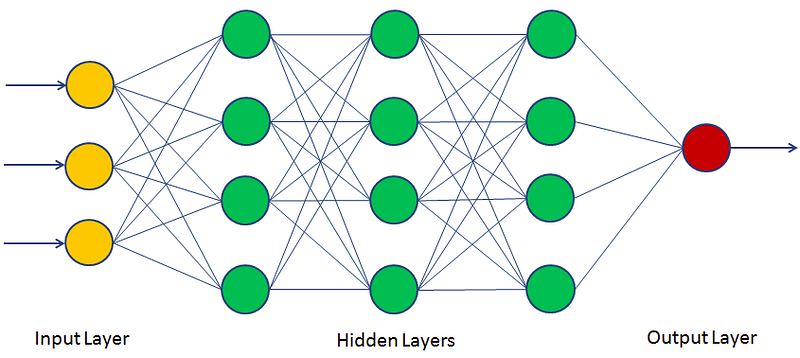

### Define MLP model

In [53]:
model = tf.keras.models.Sequential(layers=[
  # Input layer
  tf.keras.layers.Input(shape=(X_train1.shape[1],)),   # or tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train1.shape[1],))

  # Hidden layers
  tf.keras.layers.Dense(128, activation='relu'),   # 1st hidden layer with 128 nodes
  tf.keras.layers.Dense(128, activation='relu'),   # 2nd hidden layer with 128 nodes
  tf.keras.layers.Dense(128, activation='relu'),   # 3rd hidden layer with 128 nodes

  # Output layer
  tf.keras.layers.Dense(1, activation='linear')
  ],
  trainable=True,
  name='Multi-layer_Perceptron'
)

# Compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

model.summary()

Model: "Multi-layer_Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

### Or: Shortcut, lazy, not recommended (I feel shame cuz even I do this sometimes)

In [11]:
model2 = Sequential([
  # Hidden layers
  Dense(128, activation='relu', input_shape=(X_train1.shape[1],)),   # Input layer + 1st hidden layer
  Dense(128, activation='relu'),                                    # 2nd hidden layer
  Dense(128, activation='relu'),                                    # 3rd hidden layer

  # Output layer
  Dense(1, activation='linear')
])

# Compile the model
model2.compile(optimizer='sgd', loss='mse', metrics=['mae'])

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

### Or: TensorFlow documentation way

In [12]:
model3 = Sequential(layers=None, trainable=True, name='Multi-layer_Perceptron')

# Add input layer
model3.add(Input(shape=(X_train1.shape[1],)))

# Add 3 hidden layers
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))

# Add output layer
model3.add(Dense(1, activation='linear'))

# Compile the model
model3.compile(optimizer='sgd', loss='mse', metrics=['mae'])

model3.summary()

Model: "Multi-layer_Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

### Or: Oldschool TensorFlow

In [13]:
# Input layer
inputs = Input(shape=(X_train1.shape[1],))

# 3 hidden layers
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Output layer
outputs = Dense(1, activation='linear')(x)

# Create the model
model4 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model4.compile(optimizer='sgd', loss='mse', metrics=['mae'])

model4.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

### I recommend this way (it's cleaner with more complex model architecture)

In [14]:
import json
with open('mlp_module.json', 'r') as f:
  module = json.load(f)

In [95]:
class MLP:
  def __init__(self, model_module: dict) -> None:
    """ Initialization

    Args:
      model_module (dict): A dictionary containing the model hyperparameters
    Returns:
      (None)
    """
    self.module = model_module

    # Build Neural Network
    self.model = self.build_mlp()

    # Compile the model
    self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

  def build_mlp(self) -> Sequential:
    """ Build the MLP model

    Args:
      (None)
    Returns:
      (tf.keras.models.Sequential): A fully connected neural network - MLP model
    """

    def build_block(model: Sequential, module: dict) -> None:
      """ Build a block/hidden-layer of the MLP model

      Args:
        model (tf.keras.models.Sequential): An under-construction neural network
        module (dict): A dictionary containing the model hyperparameters
      Returns:
        (tf.keras.models.Sequential): A neural network with Input and Hidden layers
      """

      model.add(
          Dense(
              units=self.module['hidden_layer']['num_nodes'],
              activation=self.module['hidden_layer']['activation']
          )
      )

    model = Sequential(layers=None, trainable=True, name='Multi-layer_Perceptron')

    # Input layer
    input_shape = X_train1.shape[1] if module['input_layer']['shape'] == "None" else module['input_layer']['shape']
    model.add(Input(shape=(input_shape,)))

    # Hidden layers
    for _ in range(self.module['hidden_layer']['num_layers']):
      build_block(model, self.module)

    # Output layer
    model.add(Dense(1, activation='linear'))

    return model

mlp = MLP(module)
mlp.model.summary()

Model: "Multi-layer_Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                     │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Train the model
history = mlp.model.fit(
    x=X_train1,
    y=y_train1,
    epochs=100,
    batch_size=8,
    validation_split=0.2,
    verbose=2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
)

Epoch 1/100
32/32 - 3s - 79ms/step - loss: 1840.9634 - val_loss: 476.8039
Epoch 2/100
32/32 - 0s - 5ms/step - loss: 226.5795 - val_loss: 219.3953
Epoch 3/100
32/32 - 0s - 10ms/step - loss: 170.7026 - val_loss: 195.1483
Epoch 4/100
32/32 - 0s - 5ms/step - loss: 152.9189 - val_loss: 171.4031
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 138.8552 - val_loss: 185.6211
Epoch 6/100
32/32 - 0s - 10ms/step - loss: 146.0452 - val_loss: 163.0592
Epoch 7/100
32/32 - 0s - 8ms/step - loss: 134.1312 - val_loss: 151.2003
Epoch 8/100
32/32 - 0s - 6ms/step - loss: 134.8251 - val_loss: 149.4474
Epoch 9/100
32/32 - 0s - 10ms/step - loss: 126.4539 - val_loss: 155.7101
Epoch 10/100
32/32 - 0s - 5ms/step - loss: 123.5161 - val_loss: 221.4470
Epoch 11/100
32/32 - 0s - 9ms/step - loss: 126.0758 - val_loss: 159.9808
Epoch 12/100
32/32 - 0s - 10ms/step - loss: 146.1182 - val_loss: 205.6879
Epoch 13/100
32/32 - 0s - 10ms/step - loss: 120.1425 - val_loss: 117.6339
Epoch 14/100
32/32 - 0s - 5ms/step - loss: 114.8122 -

In [97]:
# Evaluate the model
loss = mlp.model.evaluate(X_test1, y_test1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.1263


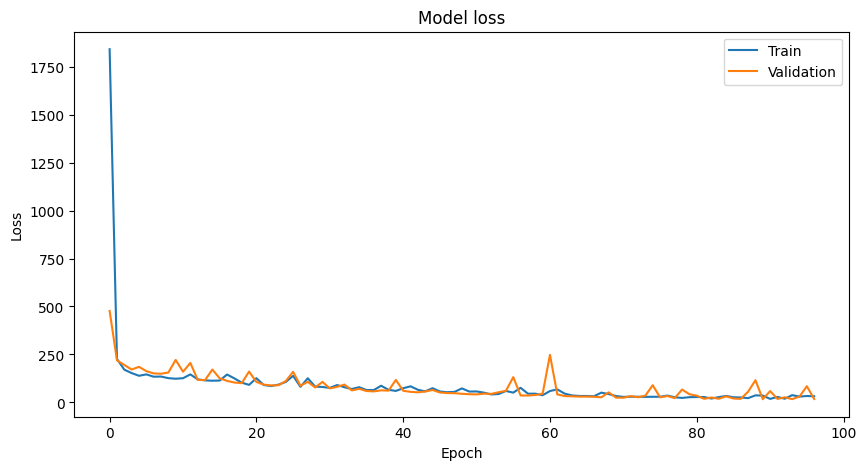

In [98]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


### Prediction

In [99]:
X_test1.head(5)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
249,8,260.0,110.0,3365.0,15.5,78,1
138,8,318.0,150.0,4457.0,13.5,74,1
292,8,360.0,150.0,3940.0,13.0,79,1
357,4,119.0,100.0,2615.0,14.8,81,3
25,8,360.0,215.0,4615.0,14.0,70,1


In [100]:
predictions = mlp.model.predict(X_test1.head(5))
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[20.31814 ],
       [16.674456],
       [17.145052],
       [29.927301],
       [14.422106]], dtype=float32)

In [101]:
targets = y_test1.head(5)
targets.values

array([19.9, 14. , 18.5, 32.9, 10. ])

In [102]:
for i in range(len(targets)):
  print(f"Target: {targets.values[i]} -- Prediction: {predictions[i][0]}")

Target: 19.9 -- Prediction: 20.318140029907227
Target: 14.0 -- Prediction: 16.674455642700195
Target: 18.5 -- Prediction: 17.145051956176758
Target: 32.9 -- Prediction: 29.92730140686035
Target: 10.0 -- Prediction: 14.42210578918457
